In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import bokeh.plotting as blt
import fit_pendulum_data as p1
import midpoint_vec as p2

# Homework 2
Michael Seaman
2/14/16

## Problem 5.18
### Polynomial fitting to expirimental data

fit_pendulum_data.py has 2 functions defined for it. The first, the retrieve function finds the file pendulum.dat and gets 2 lists of values: one of Pendulum lengths and one of their periods. They are plotted below.

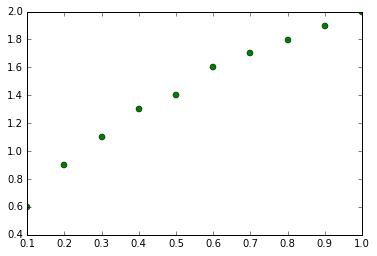

In [2]:
p_data = p1.retrieve_pendulum_data()
plt.plot(p_data[0],p_data[1],'go')

plt.show()

The second method defined fits a polynomial curve to the data points and then plots it. Here we will try a 1, 2, and 3, degree polynomial.

Fitted Curve of degree 1: 
 
1.485 x + 0.6133
Fitted Curve of degree 2: 
        2
-1.023 x + 2.61 x + 0.3883
Fitted Curve of degree 3: 
       3         2
1.068 x - 2.786 x + 3.423 x + 0.2967


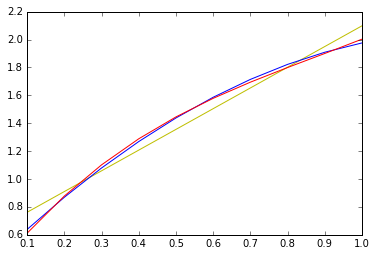

In [3]:
p_data = p1.retrieve_pendulum_data()
fit1 = p1.pendulum_fit(p_data[0],p_data[1],1)
plt.plot(fit1[0],fit1[1],'y')
fit2 = p1.pendulum_fit(p_data[0],p_data[1],2)
plt.plot(fit2[0],fit2[1],'b')
fit3 = p1.pendulum_fit(p_data[0],p_data[1],3)
plt.plot(fit3[0],fit3[1],'r')

plt.show()

And plotted with the data points, we can clearly see that the cubic fit is the most accurate. 

Fitted Curve of degree 1: 
 
1.485 x + 0.6133
Fitted Curve of degree 2: 
        2
-1.023 x + 2.61 x + 0.3883
Fitted Curve of degree 3: 
       3         2
1.068 x - 2.786 x + 3.423 x + 0.2967


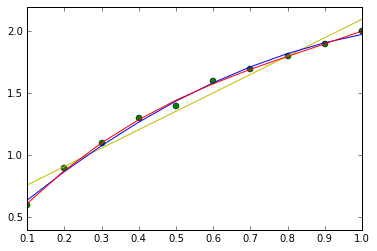

In [4]:
p_data = p1.retrieve_pendulum_data()
plt.plot(p_data[0],p_data[1],'go')
fit1 = p1.pendulum_fit(p_data[0],p_data[1],1)
plt.plot(fit1[0],fit1[1],'y')
fit2 = p1.pendulum_fit(p_data[0],p_data[1],2)
plt.plot(fit2[0],fit2[1],'b')
fit3 = p1.pendulum_fit(p_data[0],p_data[1],3)
plt.plot(fit3[0],fit3[1],'r')

plt.show()

## Problem 5.22 Vectorizing the Midpoint Integration

In this excercise, we have 3 implementations of the Midpoint rule for integration:
$$\int_{a}^{b}f(x)dx\approx h \sum_{i=1}^{n}f(a + \frac{h}{2} + ih)$$
where h = (b-a)/n
The three implementations differ in which summation function they use. The first is simply a python for loop that iterates over the values and summates them all gradually.


In [5]:
def f(x):
    return x**3 - 15*x

print(p2.midpointint(f, 0, 10, 1000))
%timeit p2.midpointint(f, 0, 10, 1000)

1749.99875
1000 loops, best of 3: 449 µs per loop


Next employs the built-in python sum() function to do the same thing.

In [7]:
print(p2.midpointint_python_sum(f, 0, 10, 1000))
%timeit p2.midpointint_python_sum(f, 0, 10, 1000)

1749.99875
1000 loops, best of 3: 488 µs per loop


Finally, the use of numpy's sum() function:

In [8]:
print(p2.midpointint_numpy_sum(f, 0, 10, 1000))
%timeit p2.midpointint_numpy_sum(f, 0, 10, 1000)

1749.99875
1000 loops, best of 3: 548 µs per loop
